Import Python libraries that are needed for the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score

Read the cleaned data in the credit\_score\_data\_cleaned CSV file that was generated using the original credit\_score\_data file and the Project\_2\_data\_cleaning\_notebook.

In [2]:
credit_score_df = pd.read_csv('credit_score/credit_score_data_cleaned.csv', index_col=0)

In [3]:
credit_score_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Personal Loan,Home Equity Loan,Not Specified,Mortgage Loan,Student Loan,Debt Consolidation Loan,Payday Loan,Payment_Behaviour_Low_Spent,Payment_Behaviour_Small_value_payments,Payment_Behaviour_Medium_value_payments
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,1,1,0,0,0,0,0,0,1,0
1,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,1,1,0,0,0,0,0,1,0,1
2,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,1,1,0,0,0,0,0,1,1,0
3,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,1,1,0,0,0,0,0,1,1,0
4,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,1,1,0,0,0,0,0,0,0,1


In [4]:
credit_score_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan',
       'Not Specified', 'Mortgage Loan', 'Student Loan',
       'Debt Consolidation Loan', 'Payday Loan', 'Payment_Behaviour_Low_Spent',
       'Payment_Behaviour_Small_value_payments',
       'Payment_Behaviour_Medium_value_payments'],
      dtype='object')

In [5]:
credit_score_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75821 entries, 0 to 75820
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       75821 non-null  object 
 1   Customer_ID                              75821 non-null  object 
 2   Month                                    75821 non-null  object 
 3   Name                                     68235 non-null  object 
 4   Age                                      75821 non-null  int64  
 5   SSN                                      75821 non-null  object 
 6   Occupation                               75821 non-null  object 
 7   Annual_Income                            75821 non-null  float64
 8   Monthly_Inhand_Salary                    75821 non-null  float64
 9   Num_Bank_Accounts                        75821 non-null  int64  
 10  Num_Credit_Card                          75821 non-

Intuitively, the 'ID', 'Customer_ID', 'Name', 'Month' and 'SSN' columns should not be affecting the credit score of a customer. Hence, we will drop these 5 columns from the data.

In [6]:
credit_score_df.drop(columns=[ 'ID', 'Name', 'Customer_ID', 'Month', 'SSN'], inplace=True)

In [7]:
credit_score_df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan',
       'Not Specified', 'Mortgage Loan', 'Student Loan',
       'Debt Consolidation Loan', 'Payday Loan', 'Payment_Behaviour_Low_Spent',
       'Payment_Behaviour_Small_value_payments',
       'Payment_Behaviour_Medium_value_payments'],
      dtype='object')

Visualize the distribution/value counts for the features 

C:\Users\jimta\anaconda3\envs\base_anaconda_env\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


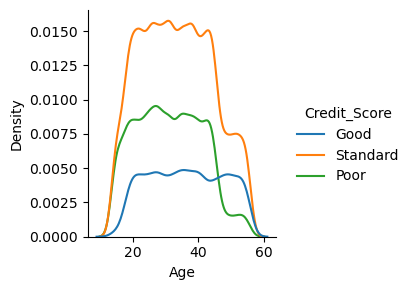

In [8]:
sns.displot(credit_score_df, x='Age', hue='Credit_Score',kind='kde',height=3)

Older people have slightly better credit score than the younger ones

In [9]:
occupations = list(credit_score_df['Occupation'].value_counts().index)
for occup in occupations:
    num_of_records = sum(credit_score_df['Occupation'] == occup)
    print('There are {} loan records with customer being a {}.'.format(num_of_records,occup))
    
    num_of_Poor = len(credit_score_df[(credit_score_df['Credit_Score'] == 'Poor') 
                                      & (credit_score_df['Occupation'] == occup)])
    num_of_Standard = len(credit_score_df[(credit_score_df['Credit_Score'] == 'Standard')
                                          & (credit_score_df['Occupation'] == occup)])
    num_of_Good = len(credit_score_df[(credit_score_df['Credit_Score'] == 'Good')
                                      & (credit_score_df['Occupation'] == occup)])
    
    print('{} percent of them are with Poor credit score.'.format(round(num_of_Poor/num_of_records*100, 2)))
    print('{} percent of them are with Standard credit score.'.format(round(num_of_Standard/num_of_records*100),2))
    print('{} percent of them are with Good credit score.'.format(round(num_of_Good/num_of_records*100,2)))
    print()

There are 5415 loan records with customer being a Lawyer.
27.61 percent of them are with Poor credit score.
55 percent of them are with Standard credit score.
17.71 percent of them are with Good credit score.

There are 5209 loan records with customer being a Engineer.
30.33 percent of them are with Poor credit score.
52 percent of them are with Standard credit score.
17.57 percent of them are with Good credit score.

There are 5134 loan records with customer being a Mechanic.
30.62 percent of them are with Poor credit score.
53 percent of them are with Standard credit score.
16.34 percent of them are with Good credit score.

There are 5119 loan records with customer being a Entrepreneur.
30.67 percent of them are with Poor credit score.
52 percent of them are with Standard credit score.
17.72 percent of them are with Good credit score.

There are 5114 loan records with customer being a Accountant.
30.47 percent of them are with Poor credit score.
51 percent of them are with Standard c

All occupations seem to have similar percentage of records with Good/Standard/Poor credit scores, except the percentage of Good credit score is slightly lower (4% to 5%) for the customers who are Writer. Since creating dummy variables for the Occupation column will need to generate 14 new columns that could contribute very little to the accuracy of the tree-based algorithms, we decide to drop the Occupation column.

In [10]:
credit_score_df.drop(columns=['Occupation'], inplace=True)

C:\Users\jimta\anaconda3\envs\base_anaconda_env\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


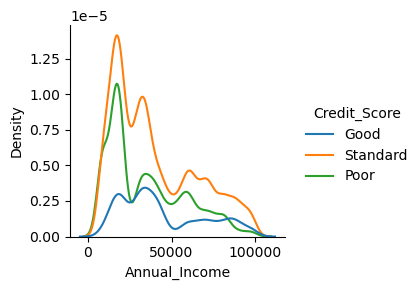

In [11]:
sns.displot(credit_score_df[credit_score_df['Annual_Income'] <= 100000], x='Annual_Income', hue='Credit_Score',kind='kde',height=3)

C:\Users\jimta\anaconda3\envs\base_anaconda_env\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


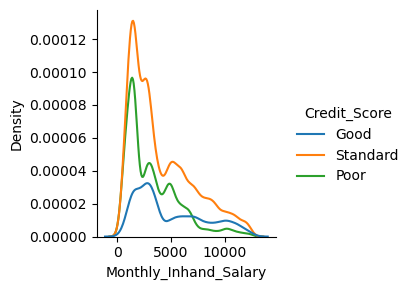

In [12]:
sns.displot(credit_score_df[credit_score_df['Monthly_Inhand_Salary'] <= 12500], x='Monthly_Inhand_Salary', 
            hue='Credit_Score',kind='kde',height=3)

C:\Users\jimta\anaconda3\envs\base_anaconda_env\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\jimta\anaconda3\envs\base_anaconda_env\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\jimta\anaconda3\envs\base_anaconda_env\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


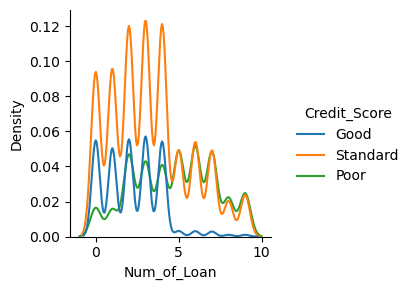

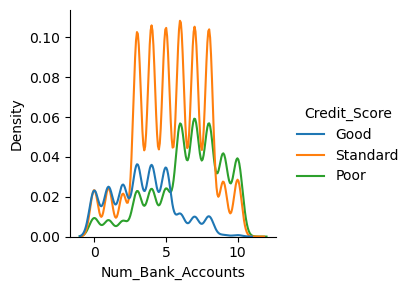

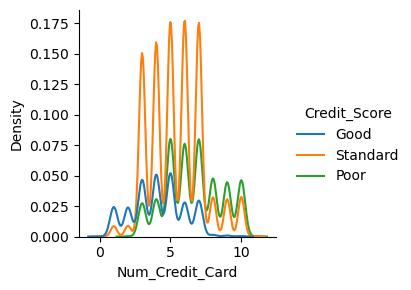

In [13]:
sns.displot(credit_score_df, x='Num_of_Loan', hue='Credit_Score',kind='kde',height=3)
sns.displot(credit_score_df, x='Num_Bank_Accounts', hue='Credit_Score',kind='kde',height=3)
sns.displot(credit_score_df, x='Num_Credit_Card', hue='Credit_Score',kind='kde',height=3)

Customers with 'Poor' on credit score tend to have more number of loans, bank accounts and credit cards, while the customers with 'Good' credit score tend to have less number of loans, bank accounts and credit cards.

C:\Users\jimta\anaconda3\envs\base_anaconda_env\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


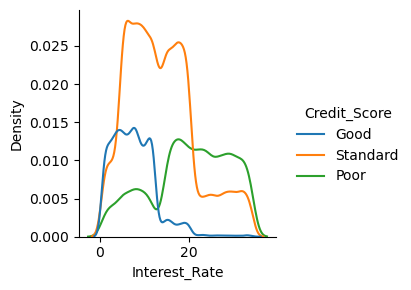

In [14]:
sns.displot(credit_score_df, x='Interest_Rate', hue='Credit_Score',kind='kde',height=3)

Customers with 'Poor' on credit score tend to have higher interest rate, while the customers with 'Good' credit score tend to have lower.

C:\Users\jimta\anaconda3\envs\base_anaconda_env\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


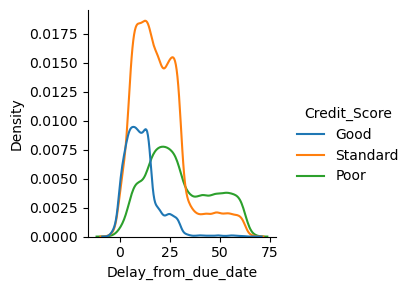

In [15]:
sns.displot(credit_score_df, x='Delay_from_due_date', hue='Credit_Score',kind='kde',height=3)

C:\Users\jimta\anaconda3\envs\base_anaconda_env\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


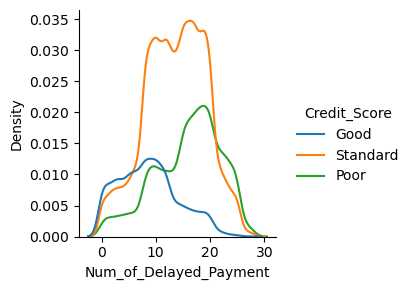

In [16]:
sns.displot(credit_score_df, x='Num_of_Delayed_Payment', hue='Credit_Score',kind='kde',height=3)

C:\Users\jimta\anaconda3\envs\base_anaconda_env\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


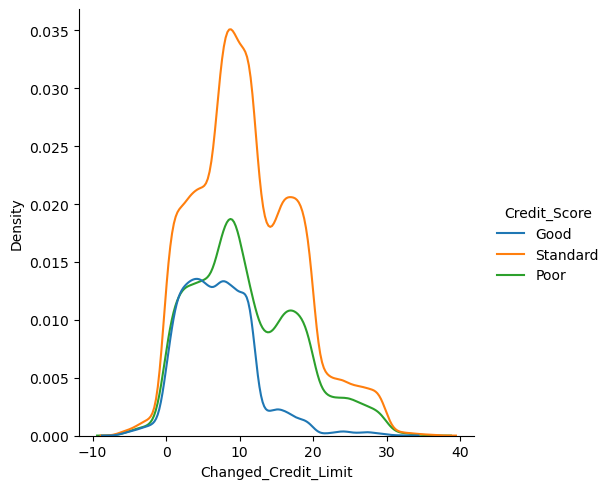

In [17]:
sns.displot(credit_score_df, x='Changed_Credit_Limit', hue='Credit_Score',kind='kde')

C:\Users\jimta\anaconda3\envs\base_anaconda_env\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


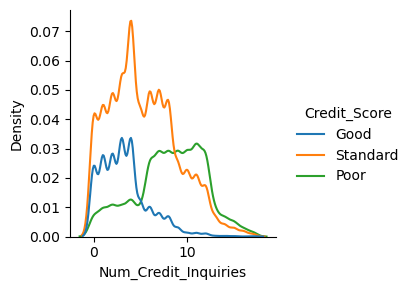

In [18]:
sns.displot(credit_score_df, x='Num_Credit_Inquiries', hue='Credit_Score',kind='kde',height=3)

In [19]:
credit_score_df[credit_score_df['Credit_Score'] == 'Good']['Credit_Mix'].value_counts()

Credit_Mix
Good        8840
Standard    4237
Bad          207
Name: count, dtype: int64

In [20]:
credit_score_df[credit_score_df['Credit_Score'] == 'Standard']['Credit_Mix'].value_counts()

Credit_Mix
Standard    28539
Good         6408
Bad          5531
Name: count, dtype: int64

In [21]:
credit_score_df[credit_score_df['Credit_Score'] == 'Poor']['Credit_Mix'].value_counts()

Credit_Mix
Standard    10498
Bad          8646
Good         2915
Name: count, dtype: int64

Geater portion of people with 'Bad' credit mix has 'Poor' credit score, while people with 'Good' credit mix tend to have 'Good' credit score.

In [22]:
# Create dummy variables for the Credit_Mix column
credit_mix_df = pd.get_dummies(credit_score_df['Credit_Mix'],prefix="Credit_Mix",prefix_sep='_',dtype=int,drop_first=True)
credit_score_df = pd.concat([credit_score_df.drop(columns=['Credit_Mix']),credit_mix_df], axis = 1)
credit_score_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Not Specified,Mortgage Loan,Student Loan,Debt Consolidation Loan,Payday Loan,Payment_Behaviour_Low_Spent,Payment_Behaviour_Small_value_payments,Payment_Behaviour_Medium_value_payments,Credit_Mix_Good,Credit_Mix_Standard
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,...,0,0,0,0,0,0,1,0,0,1
1,23,19114.12,1824.843333,3,4,3,4,3,7,0.00,...,0,0,0,0,0,1,0,1,1,0
2,23,19114.12,1824.843333,3,4,3,4,5,4,6.27,...,0,0,0,0,0,1,1,0,1,0
3,23,19114.12,1824.843333,3,4,3,4,3,8,11.27,...,0,0,0,0,0,1,1,0,1,0
4,23,19114.12,1824.843333,3,4,3,4,3,6,11.27,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75816,29,20002.88,1929.906667,10,8,29,5,33,25,18.31,...,0,1,1,0,0,0,0,0,0,0
75817,25,39628.99,3359.415833,4,6,7,2,20,6,9.50,...,0,0,1,0,0,0,0,1,0,1
75818,25,39628.99,3359.415833,4,6,7,2,23,7,11.50,...,0,0,1,0,0,0,0,0,0,1
75819,25,39628.99,3359.415833,4,6,7,2,18,7,11.50,...,0,0,1,0,0,0,0,1,0,1


C:\Users\jimta\anaconda3\envs\base_anaconda_env\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


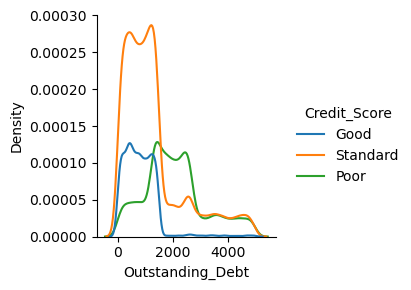

In [23]:
sns.displot(credit_score_df, x='Outstanding_Debt', hue='Credit_Score',kind='kde',height=3)

C:\Users\jimta\anaconda3\envs\base_anaconda_env\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


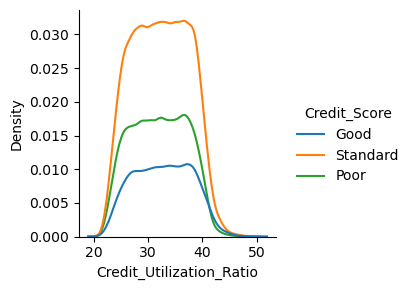

In [24]:
sns.displot(credit_score_df, x='Credit_Utilization_Ratio', hue='Credit_Score',kind='kde',height=3)

The value of credit utilization ratio doesn't seem to have clear correlation with one's credit score. All three classes seem to be normally distributed with mean around 32.5.

C:\Users\jimta\anaconda3\envs\base_anaconda_env\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


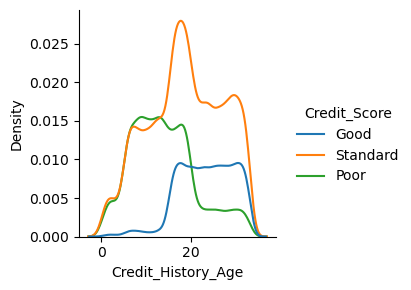

In [25]:
sns.displot(credit_score_df, x='Credit_History_Age', hue='Credit_Score',kind='kde',height=3)

Customers with longer credit history tend to have better credit score

In [26]:
credit_score_df[credit_score_df['Credit_Score'] == 'Poor']['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    15773
No      3630
NM      2656
Name: count, dtype: int64

In [27]:
credit_score_df[credit_score_df['Credit_Score'] == 'Standard']['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    22752
No     12987
NM      4739
Name: count, dtype: int64

In [28]:
credit_score_df[credit_score_df['Credit_Score'] == 'Good']['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
No     10172
NM      1683
Yes     1429
Name: count, dtype: int64

Customers with better credit score tend to have 'No' on Payment_of_Min_Amount

In [29]:
# Create dummy variables for the Credit_Mix column
pay_min_df = pd.get_dummies(credit_score_df['Payment_of_Min_Amount'],prefix="Payment_of_Min_Amount",prefix_sep='_',dtype=int,drop_first=True)
credit_score_df = pd.concat([credit_score_df.drop(columns=['Payment_of_Min_Amount']),pay_min_df], axis = 1)
credit_score_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Student Loan,Debt Consolidation Loan,Payday Loan,Payment_Behaviour_Low_Spent,Payment_Behaviour_Small_value_payments,Payment_Behaviour_Medium_value_payments,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,...,0,0,0,0,1,0,0,1,1,0
1,23,19114.12,1824.843333,3,4,3,4,3,7,0.00,...,0,0,0,1,0,1,1,0,1,0
2,23,19114.12,1824.843333,3,4,3,4,5,4,6.27,...,0,0,0,1,1,0,1,0,1,0
3,23,19114.12,1824.843333,3,4,3,4,3,8,11.27,...,0,0,0,1,1,0,1,0,1,0
4,23,19114.12,1824.843333,3,4,3,4,3,6,11.27,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75816,29,20002.88,1929.906667,10,8,29,5,33,25,18.31,...,1,0,0,0,0,0,0,0,0,1
75817,25,39628.99,3359.415833,4,6,7,2,20,6,9.50,...,1,0,0,0,0,1,0,1,1,0
75818,25,39628.99,3359.415833,4,6,7,2,23,7,11.50,...,1,0,0,0,0,0,0,1,1,0
75819,25,39628.99,3359.415833,4,6,7,2,18,7,11.50,...,1,0,0,0,0,1,0,1,1,0


C:\Users\jimta\anaconda3\envs\base_anaconda_env\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


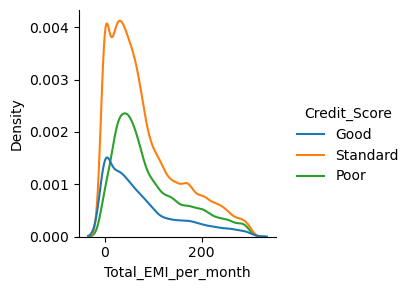

In [30]:
sns.displot(credit_score_df[credit_score_df['Total_EMI_per_month'] <= 300], x='Total_EMI_per_month', 
            hue='Credit_Score',kind='kde',height=3)

Cusomers with better credit score tend to have slightly lowewr total EMI per month

C:\Users\jimta\anaconda3\envs\base_anaconda_env\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


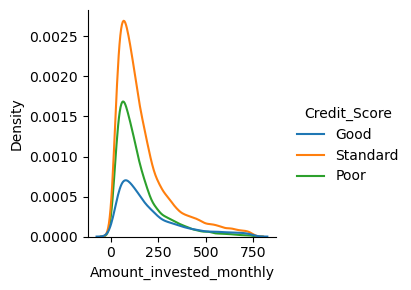

In [31]:
sns.displot(credit_score_df[credit_score_df['Amount_invested_monthly'] <= 750], x='Amount_invested_monthly', 
            hue='Credit_Score',kind='kde',height=3)

It doesn't seem to be there is clear correlation between a customer's credit score and his/her amount of monthly investment. 

C:\Users\jimta\anaconda3\envs\base_anaconda_env\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


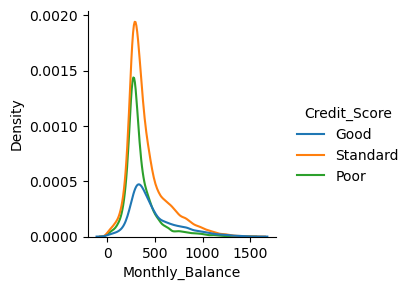

In [32]:
sns.displot(credit_score_df, x='Monthly_Balance', hue='Credit_Score',kind='kde',height=3)

Cusomers with better credit score tend to have higher monthly balance

In [33]:
credit_score_df[credit_score_df['Credit_Score'] == 'Poor']['Payment_Behaviour_Low_Spent'].value_counts()

Payment_Behaviour_Low_Spent
1    13293
0     8766
Name: count, dtype: int64

In [34]:
credit_score_df[credit_score_df['Credit_Score'] == 'Standard']['Payment_Behaviour_Low_Spent'].value_counts()

Payment_Behaviour_Low_Spent
1    21132
0    19346
Name: count, dtype: int64

In [35]:
credit_score_df[credit_score_df['Credit_Score'] == 'Good']['Payment_Behaviour_Low_Spent'].value_counts()

Payment_Behaviour_Low_Spent
0    7207
1    6077
Name: count, dtype: int64

Customers with 'Poor' credit score tend to have lower spent on their payment behaviour

In [36]:
credit_score_df[credit_score_df['Credit_Score'] == 'Poor']['Payment_Behaviour_Small_value_payments'].value_counts()

Payment_Behaviour_Small_value_payments
0    12053
1    10006
Name: count, dtype: int64

In [37]:
credit_score_df[credit_score_df['Credit_Score'] == 'Poor']['Payment_Behaviour_Medium_value_payments'].value_counts()

Payment_Behaviour_Medium_value_payments
0    14908
1     7151
Name: count, dtype: int64

In [38]:
print('Number of records with Poor credit score and Large value payments as part of their payment behavior: ' 
      + str(len(credit_score_df[(credit_score_df['Credit_Score'] == 'Poor') 
                                 & (credit_score_df['Payment_Behaviour_Medium_value_payments'] == 0) 
                                 & (credit_score_df['Payment_Behaviour_Small_value_payments'] == 0)])))

Number of records with Poor credit score and Large value payments as part of their payment behavior: 4902


In [39]:
credit_score_df[credit_score_df['Credit_Score'] == 'Standard']['Payment_Behaviour_Small_value_payments'].value_counts()

Payment_Behaviour_Small_value_payments
0    24805
1    15673
Name: count, dtype: int64

In [40]:
credit_score_df[credit_score_df['Credit_Score'] == 'Standard']['Payment_Behaviour_Medium_value_payments'].value_counts()

Payment_Behaviour_Medium_value_payments
0    26584
1    13894
Name: count, dtype: int64

In [41]:
print('Number of records with Standard credit score and Large value payments as part of their payment behavior: ' 
      + str(len(credit_score_df[(credit_score_df['Credit_Score'] == 'Standard') 
                                 &(credit_score_df['Payment_Behaviour_Medium_value_payments'] == 0) 
                                 & (credit_score_df['Payment_Behaviour_Small_value_payments'] == 0)])))

Number of records with Standard credit score and Large value payments as part of their payment behavior: 10911


In [42]:
credit_score_df[credit_score_df['Credit_Score'] == 'Good']['Payment_Behaviour_Small_value_payments'].value_counts()

Payment_Behaviour_Small_value_payments
0    9011
1    4273
Name: count, dtype: int64

In [43]:
credit_score_df[credit_score_df['Credit_Score'] == 'Good']['Payment_Behaviour_Medium_value_payments'].value_counts()

Payment_Behaviour_Medium_value_payments
0    8376
1    4908
Name: count, dtype: int64

In [44]:
print('Number of records with Good credit score and Large value payments as part of their payment behavior: ' 
      + str(len(credit_score_df[(credit_score_df['Credit_Score'] == 'Good') 
                                 &(credit_score_df['Payment_Behaviour_Medium_value_payments'] == 0) 
                                 & (credit_score_df['Payment_Behaviour_Small_value_payments'] == 0)])))

Number of records with Good credit score and Large value payments as part of their payment behavior: 4103


Customers with better credit score tend to have largeer value payments in their payment bahaviours

In [45]:
# Check if there is certain loan types with more customers with Good/Poor credit score 
loan_types=['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan', 'Not Specified', 
            'Mortgage Loan', 'Student Loan', 'Debt Consolidation Loan', 'Payday Loan']

for Ltype in loan_types:
    print('There are {} loan records with {}.'.format(sum(credit_score_df[Ltype]), Ltype))
    
    num_of_Poor = len(credit_score_df[(credit_score_df['Credit_Score'] == 'Poor') 
                                      & (credit_score_df[Ltype] == 1)])
    num_of_Standard = len(credit_score_df[(credit_score_df['Credit_Score'] == 'Standard')
                                          & (credit_score_df[Ltype] == 1)])
    num_of_Good = len(credit_score_df[(credit_score_df['Credit_Score'] == 'Good')
                                      & (credit_score_df[Ltype] == 1)])
    
    print('{} percent of them are with Poor credit score.'.format(round(num_of_Poor/sum(credit_score_df[Ltype])*100, 2)))
    print('{} percent of them are with Standard credit score.'.format(round(num_of_Standard/sum(credit_score_df[Ltype])*100),2))
    print('{} percent of them are with Good credit score.'.format(round(num_of_Good/sum(credit_score_df[Ltype])*100,2)))
    print()

There are 23104 loan records with Auto Loan.
38.35 percent of them are with Poor credit score.
50 percent of them are with Standard credit score.
11.46 percent of them are with Good credit score.

There are 23913 loan records with Credit-Builder Loan.
37.49 percent of them are with Poor credit score.
50 percent of them are with Standard credit score.
12.04 percent of them are with Good credit score.

There are 23613 loan records with Personal Loan.
37.09 percent of them are with Poor credit score.
52 percent of them are with Standard credit score.
11.35 percent of them are with Good credit score.

There are 23708 loan records with Home Equity Loan.
37.02 percent of them are with Poor credit score.
51 percent of them are with Standard credit score.
12.08 percent of them are with Good credit score.

There are 23971 loan records with Not Specified.
37.76 percent of them are with Poor credit score.
50 percent of them are with Standard credit score.
12.57 percent of them are with Good credi

All loan types seem to have similar percentage of customers with Good/Standard/Poor credit scores.

In [46]:
credit_score_df['Credit_Score'].value_counts()

Credit_Score
Standard    40478
Poor        22059
Good        13284
Name: count, dtype: int64

Split the features into X and y, then split the data into sets for training, validation and testing

In [47]:
X = credit_score_df.drop('Credit_Score',axis=1)
y = credit_score_df['Credit_Score']

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75821 entries, 0 to 75820
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      75821 non-null  int64  
 1   Annual_Income                            75821 non-null  float64
 2   Monthly_Inhand_Salary                    75821 non-null  float64
 3   Num_Bank_Accounts                        75821 non-null  int64  
 4   Num_Credit_Card                          75821 non-null  int64  
 5   Interest_Rate                            75821 non-null  int64  
 6   Num_of_Loan                              75821 non-null  int64  
 7   Delay_from_due_date                      75821 non-null  int64  
 8   Num_of_Delayed_Payment                   75821 non-null  int64  
 9   Changed_Credit_Limit                     75821 non-null  float64
 10  Num_Credit_Inquiries                     75821 non-

In [49]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=101)

Train the Random Forest, AdaBoost and Gradiant Boosting models with different numbers of weak estimators and then use the elbow method along with the validation data to find the best sweet number of weak estimators (i.e. when the marginal gain on accuracy by adding one more weak estimator becomes negligible) for each of the 3 models respectively

In [50]:
# Initialize an empty list to store error rates for Random Forest with different numbers of weak learners
errors_rfc = []

# Use for loop to generate the accuracy/error rates of Random Forest against the number of weak learners it consists.
for i in range(1,100):
    rfc = RandomForestClassifier(n_estimators=i, random_state=101)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_val)
    err = 1 - accuracy_score(preds,y_val)
    errors_rfc.append(err)
    

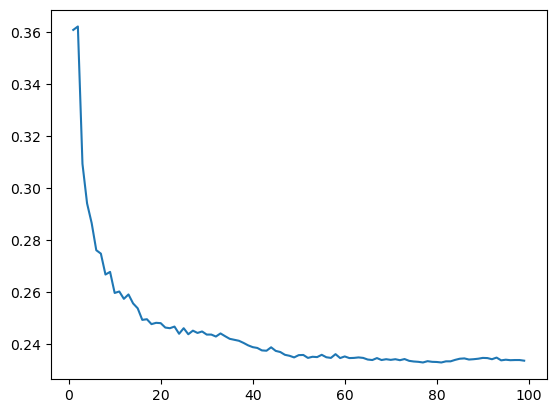

In [51]:
plt.plot(range(1,100),errors_rfc)

For random forest, after n_estimator reaches 50, the marginal gain by adding more weak estimators became negligible.

In [52]:
# Initialize an empty list to store error rates for AdaBoost with different numbers of weak learners
errors_abc = []

# Use for loop to generate the accuracy/error rates of AdaBoost against the number of weak learners it consists.
for i in range(1,100):
    abc = AdaBoostClassifier(n_estimators=i, random_state=101)
    abc.fit(X_train,y_train)
    preds = abc.predict(X_val)
    err = 1 - accuracy_score(preds,y_val)
    errors_abc.append(err)

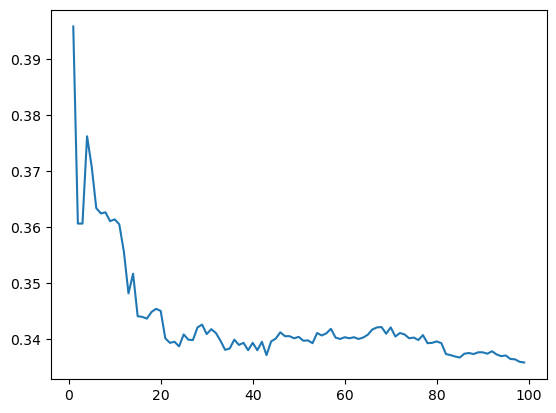

In [53]:
plt.plot(range(1,100),errors_abc)

Since the error rate has kept slightly dropping after n_estimators reaches 80 before n_estimators reaches 100, we would check 25 n_estimators further to see if the error rate still drops.

In [54]:
# Initialize an empty list to store error rates for AdaBoost with different numbers of weak learners
errors_abc = []

# Use for loop to generate the accuracy/error rates of AdaBoost against the number of weak learners it consists.
for i in range(101,125):
    abc = AdaBoostClassifier(n_estimators=i, random_state=101)
    abc.fit(X_train,y_train)
    preds = abc.predict(X_val)
    err = 1 - accuracy_score(preds,y_val)
    errors_abc.append(err)

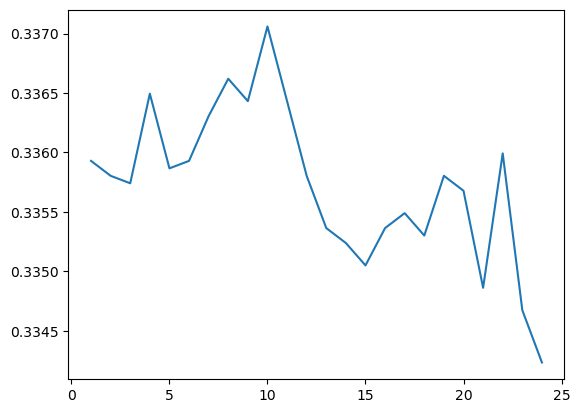

In [55]:
plt.plot(range(1,25),errors_abc)

Because adding 25 more weak estimators did not let error rate of AdaBoost decrease for more than 0.003, we will still use 80 to 100 as our optimal range of value for n_estimators.

In [56]:
# Initialize an empty list to store error rates for Gradient Boost with different numbers of weak learners
errors_gbc = []

# Use for loop to generate the accuracy/error rates of Gradient Boost against the number of weak learners it consists.
for i in range(1,100):
    gbc = GradientBoostingClassifier(n_estimators=i, random_state=101)
    gbc.fit(X_train,y_train)
    preds = gbc.predict(X_val)
    err = 1 - accuracy_score(preds,y_val)
    errors_gbc.append(err)

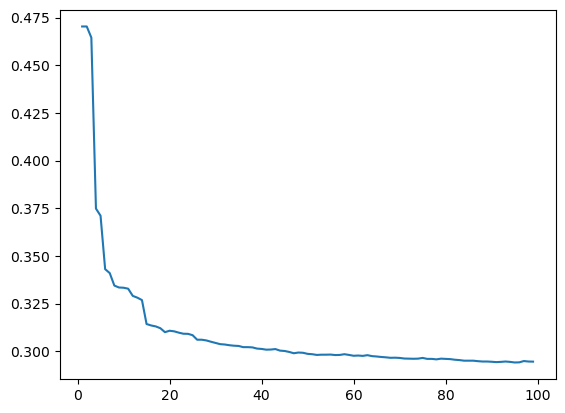

In [57]:
plt.plot(range(1,100),errors_gbc)

In [58]:
errors_gbc[40:61]

[0.3008855115242103,
 0.3009483137599699,
 0.3011995227030082,
 0.30038309363813354,
 0.3001946869308547,
 0.29969226904477797,
 0.2990014444514225,
 0.29937825786598005,
 0.29925265339446083,
 0.2986874332726245,
 0.29849902656534577,
 0.29812221315078813,
 0.29824781762230734,
 0.29824781762230734,
 0.29831061985806695,
 0.2980594109150285,
 0.29812221315078813,
 0.29849902656534577,
 0.29812221315078813,
 0.297682597500471,
 0.2978082019719902]

For gradient boosting, the error rate dropped to below 0.3 when n_estimators reaches around 50, then the marginal gain on accuracy by adding more weak estimators became negligible

Use Grid Search to find the optimal value for parameters other than n_estimators for each of the 3 algorithms

In [59]:
# Grid of hyperparameters for the RandomForestClassifier
# As mentioned above marginal gain on accuracy became negligible 
# when n_estimators reaches 50. Hence, we will use 50 as the n_estimators value in our GridSearch
param_grid = {
    "max_depth": [3, 4, 5, 6, None], # default = None
    "min_samples_leaf": [1,2,5,10,20], # default = 1
    "max_features": ['sqrt', 'log2',None], # default = 'sqrt'
    "min_impurity_decrease": [0.0,0.1,0.5,1] # default = 0.0
}
# Initialize the grid and the Ramdon Forest classifier
rfc_model = RandomForestClassifier(n_estimators=50)
rfc_grid = GridSearchCV(rfc_model,param_grid,verbose=2)

In [60]:
# Grid of hyperparameters for the AdaBoostClassifier
# As mentioned above marginal gain on accuracy became negligible 
# when n_estimators reaches 80. Hence, we will use 80 as the n_estimators value in our GridSearch
param_grid = {
    "learning_rate": [0.1, 0.5, 0.9, 1, 2] # default = 1.0
}
# Initialize the grid and the AdaBoost classifier
abc_model = AdaBoostClassifier(n_estimators=80)
abc_grid = GridSearchCV(abc_model,param_grid,verbose=2)

In [61]:
# Grid of hyperparameters for the AdaBoostClassifier
# As mentioned above marginal gain on accuracy became negligible 
# when n_estimators reaches 50. Hence, we will use 50 as the n_estimators value in our GridSearch
param_grid = {
    "learning_rate": [0.01, 0.1, 0.5, 1], # default = 0.1
    "max_features": ['sqrt', 'log2', None], # default = None
    "min_samples_leaf": [1,5,10], # default = 1
    "max_depth": [3, 5, 7], # default = 3
    "min_impurity_decrease": [0.0,0.1,0.5,1] # default = 0.0
}
# Initialize the grid and the Gradient Boosting classifier
gbc_model = GradientBoostingClassifier(n_estimators=50)
gbc_grid = GridSearchCV(gbc_model,param_grid,verbose=2)

In [62]:
rfc_grid.fit(X_train_val,y_train_val)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=   2.7s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=   2.4s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=   2.3s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=   2.5s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=   2.4s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=2; total time=   2.2s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=2; total time=   2.2s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=2; total time=   2.2s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=0.0, min_samples_

[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1; total time=   1.1s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1; total time=   0.9s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1; total time=   0.9s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1; total time=   0.9s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=2; total time=   0.9s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=2; total time=   0.9s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=2; total time=   0.9s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=2; total time=   0.9s
[CV] END max_depth=3, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=2; total time=   1.0s
[CV] END max_depth=3, max_features=sqrt, min_impurity_d

[CV] END max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=1; total time=   1.0s
[CV] END max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=1; total time=   1.0s
[CV] END max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=2; total time=   1.1s
[CV] END max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=2; total time=   1.0s
[CV] END max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=2; total time=   1.0s
[CV] END max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=2; total time=   1.1s
[CV] END max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=2; total time=   1.0s
[CV] END max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=5; total time=   1.1s
[CV] END max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=5; total time=   1.1s
[CV] END max_depth=3, max_features=lo

[CV] END max_depth=3, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=2; total time=   4.7s
[CV] END max_depth=3, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=2; total time=   4.4s
[CV] END max_depth=3, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=2; total time=   4.7s
[CV] END max_depth=3, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=2; total time=   4.7s
[CV] END max_depth=3, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=2; total time=   4.6s
[CV] END max_depth=3, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=5; total time=   4.5s
[CV] END max_depth=3, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=5; total time=   4.5s
[CV] END max_depth=3, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=5; total time=   4.6s
[CV] END max_depth=3, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=5; total time=   4.6s
[CV] END max_depth=3, max_features=No

[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=2; total time=   3.1s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=2; total time=   3.4s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=2; total time=   3.1s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=5; total time=   3.2s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=5; total time=   3.4s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=5; total time=   3.4s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=5; total time=   3.1s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=5; total time=   3.1s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=10; total time=   3.0s
[CV] END max_depth=4, max_features=s

[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=2; total time=   1.0s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=5; total time=   1.1s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=5; total time=   0.9s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=5; total time=   0.9s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=5; total time=   1.0s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=5; total time=   1.3s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=10; total time=   1.1s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=10; total time=   0.8s
[CV] END max_depth=4, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=10; total time=   1.0s
[CV] END max_depth=4, max_features=sqrt, min_impurit

[CV] END max_depth=4, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=5; total time=   1.1s
[CV] END max_depth=4, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=5; total time=   1.0s
[CV] END max_depth=4, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=5; total time=   1.0s
[CV] END max_depth=4, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=5; total time=   1.1s
[CV] END max_depth=4, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=10; total time=   1.3s
[CV] END max_depth=4, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=10; total time=   0.9s
[CV] END max_depth=4, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=10; total time=   1.0s
[CV] END max_depth=4, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=10; total time=   1.2s
[CV] END max_depth=4, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=10; total time=   1.2s
[CV] END max_depth=4, max_featur

[CV] END max_depth=4, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=5; total time=   4.8s
[CV] END max_depth=4, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=5; total time=   4.6s
[CV] END max_depth=4, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=10; total time=   4.4s
[CV] END max_depth=4, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=10; total time=   4.7s
[CV] END max_depth=4, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=10; total time=   4.4s
[CV] END max_depth=4, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=10; total time=   4.2s
[CV] END max_depth=4, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=10; total time=   4.3s
[CV] END max_depth=4, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=20; total time=   4.4s
[CV] END max_depth=4, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=20; total time=   4.3s
[CV] END max_depth=4, max_feat

[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=10; total time=   3.8s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=10; total time=   3.5s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=10; total time=   3.7s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=10; total time=   3.8s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=10; total time=   3.9s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=20; total time=   3.5s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=20; total time=   3.9s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=20; total time=   3.5s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=20; total time=   4.0s
[CV] END max_depth=5, max_fe

[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=10; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=10; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=10; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=20; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=20; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=20; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=20; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=20; total time=   0.9s
[CV] END max_depth=5, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=1; total time=   3.4s
[CV] END max_depth=5, max_features=log2, min_

[CV] END max_depth=5, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=10; total time=   1.1s
[CV] END max_depth=5, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=20; total time=   1.0s
[CV] END max_depth=5, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=20; total time=   0.9s
[CV] END max_depth=5, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=20; total time=   1.1s
[CV] END max_depth=5, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=20; total time=   1.0s
[CV] END max_depth=5, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=20; total time=   1.0s
[CV] END max_depth=5, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1; total time=   0.9s
[CV] END max_depth=5, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1; total time=   1.0s
[CV] END max_depth=5, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1; total time=   0.9s
[CV] END max_depth=5, max_features=lo

[CV] END max_depth=5, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=20; total time=   4.2s
[CV] END max_depth=5, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=20; total time=   4.3s
[CV] END max_depth=5, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=20; total time=   4.6s
[CV] END max_depth=5, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=20; total time=   4.6s
[CV] END max_depth=5, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=1; total time=   4.1s
[CV] END max_depth=5, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=1; total time=   4.2s
[CV] END max_depth=5, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=1; total time=   4.5s
[CV] END max_depth=5, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=1; total time=   4.1s
[CV] END max_depth=5, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=1; total time=   4.2s
[CV] END max_depth=5, max_feature

[CV] END max_depth=6, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=20; total time=   4.4s
[CV] END max_depth=6, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=20; total time=   4.5s
[CV] END max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1; total time=   1.0s
[CV] END max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1; total time=   1.1s
[CV] END max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1; total time=   1.1s
[CV] END max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1; total time=   1.0s
[CV] END max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1; total time=   1.1s
[CV] END max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=2; total time=   0.9s
[CV] END max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=2; total time=   1.0s
[CV] END max_depth=6, max_features=

[CV] END max_depth=6, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=1; total time=   4.6s
[CV] END max_depth=6, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=1; total time=   4.8s
[CV] END max_depth=6, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=1; total time=   5.0s
[CV] END max_depth=6, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=1; total time=   4.8s
[CV] END max_depth=6, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=1; total time=   4.6s
[CV] END max_depth=6, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=2; total time=   5.0s
[CV] END max_depth=6, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=2; total time=   4.7s
[CV] END max_depth=6, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=2; total time=   4.7s
[CV] END max_depth=6, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=2; total time=   4.9s
[CV] END max_depth=6, max_features=lo

[CV] END max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1; total time=   0.9s
[CV] END max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1; total time=   1.1s
[CV] END max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1; total time=   0.9s
[CV] END max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=2; total time=   1.0s
[CV] END max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=2; total time=   1.0s
[CV] END max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=2; total time=   1.1s
[CV] END max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=2; total time=   1.4s
[CV] END max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=2; total time=   1.1s
[CV] END max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=5; total time=   1.1s
[CV] END max_depth=6, max_features=log2, min_impurity_d

[CV] END max_depth=6, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=1; total time=   4.9s
[CV] END max_depth=6, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=2; total time=   5.0s
[CV] END max_depth=6, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=2; total time=   4.9s
[CV] END max_depth=6, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=2; total time=   4.7s
[CV] END max_depth=6, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=2; total time=   4.4s
[CV] END max_depth=6, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=2; total time=   4.9s
[CV] END max_depth=6, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=5; total time=   4.8s
[CV] END max_depth=6, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=5; total time=   4.5s
[CV] END max_depth=6, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=5; total time=   5.0s
[CV] END max_depth=6, max_features=No

[CV] END max_depth=None, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=2; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=2; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=2; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=2; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=2; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=5; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=5; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=5; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=5; total time=   0.9s
[CV] END m

[CV] END max_depth=None, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=2; total time=  15.5s
[CV] END max_depth=None, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=2; total time=  15.6s
[CV] END max_depth=None, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=2; total time=  15.1s
[CV] END max_depth=None, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=2; total time=  15.6s
[CV] END max_depth=None, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=2; total time=  15.5s
[CV] END max_depth=None, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  13.4s
[CV] END max_depth=None, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  14.2s
[CV] END max_depth=None, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  13.8s
[CV] END max_depth=None, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  13.1s
[CV] END m

[CV] END max_depth=None, max_features=log2, min_impurity_decrease=1, min_samples_leaf=2; total time=   0.9s
[CV] END max_depth=None, max_features=log2, min_impurity_decrease=1, min_samples_leaf=2; total time=   0.9s
[CV] END max_depth=None, max_features=log2, min_impurity_decrease=1, min_samples_leaf=2; total time=   0.9s
[CV] END max_depth=None, max_features=log2, min_impurity_decrease=1, min_samples_leaf=2; total time=   1.1s
[CV] END max_depth=None, max_features=log2, min_impurity_decrease=1, min_samples_leaf=2; total time=   0.9s
[CV] END max_depth=None, max_features=log2, min_impurity_decrease=1, min_samples_leaf=5; total time=   0.8s
[CV] END max_depth=None, max_features=log2, min_impurity_decrease=1, min_samples_leaf=5; total time=   0.9s
[CV] END max_depth=None, max_features=log2, min_impurity_decrease=1, min_samples_leaf=5; total time=   1.1s
[CV] END max_depth=None, max_features=log2, min_impurity_decrease=1, min_samples_leaf=5; total time=   0.9s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=2; total time=   4.5s
[CV] END max_depth=None, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=2; total time=   4.1s
[CV] END max_depth=None, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=2; total time=   4.3s
[CV] END max_depth=None, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=2; total time=   4.1s
[CV] END max_depth=None, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=2; total time=   4.5s
[CV] END max_depth=None, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=5; total time=   4.1s
[CV] END max_depth=None, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=5; total time=   4.1s
[CV] END max_depth=None, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=5; total time=   4.6s
[CV] END max_depth=None, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=5; total time=   4.4s
[CV] END m

GridSearchCV(estimator=RandomForestClassifier(n_estimators=50),
             param_grid={'max_depth': [3, 4, 5, 6, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_impurity_decrease': [0.0, 0.1, 0.5, 1],
                         'min_samples_leaf': [1, 2, 5, 10, 20]},
             verbose=2)

In [63]:
abc_grid.fit(X_train_val,y_train_val)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..................................learning_rate=0.1; total time=  17.5s
[CV] END ..................................learning_rate=0.1; total time=  17.0s
[CV] END ..................................learning_rate=0.1; total time=  16.8s
[CV] END ..................................learning_rate=0.1; total time=  17.6s
[CV] END ..................................learning_rate=0.1; total time=  17.0s
[CV] END ..................................learning_rate=0.5; total time=  17.1s
[CV] END ..................................learning_rate=0.5; total time=  16.6s
[CV] END ..................................learning_rate=0.5; total time=  16.9s
[CV] END ..................................learning_rate=0.5; total time=  17.4s
[CV] END ..................................learning_rate=0.5; total time=  16.5s
[CV] END ..................................learning_rate=0.9; total time=  16.4s
[CV] END ..................................learni

GridSearchCV(estimator=AdaBoostClassifier(n_estimators=80),
             param_grid={'learning_rate': [0.1, 0.5, 0.9, 1, 2]}, verbose=2)

In [64]:
gbc_grid.fit(X_train_val,y_train_val)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=   9.6s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  10.9s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  11.4s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  11.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  10.6s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  10.8s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  10.7s
[CV] END learning_rate=0.01, max_depth=3, max_f

[CV] END learning_rate=0.01, max_depth=3, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  10.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  10.6s
[CV] END learning_rate=0.01, max_depth=3, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  11.2s
[CV] END learning_rate=0.01, max_depth=3, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  11.6s
[CV] END learning_rate=0.01, max_depth=3, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  11.5s
[CV] END learning_rate=0.01, max_depth=3, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=10; total time=  11.2s
[CV] END learning_rate=0.01, max_depth=3, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=10; total time=  11.2s
[CV] END learning_rate=0.01, max_depth=3, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=10; 

[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=10; total time=  56.2s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=10; total time=  56.4s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=10; total time=  56.7s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=10; total time=  57.5s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=10; total time=  56.6s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=1; total time=  56.9s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=1; total time=  57.2s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=1

[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1; total time=  16.8s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1; total time=  17.2s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1; total time=  16.9s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1; total time=  16.8s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1; total time=  17.3s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=5; total time=  16.3s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=5; total time=  15.6s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=5; tot

[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=5; total time=  16.4s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=5; total time=  15.6s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=5; total time=  15.9s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=5; total time=  16.0s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=5; total time=  17.2s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=10; total time=  15.8s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=10; total time=  15.8s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=10; 

[CV] END learning_rate=0.01, max_depth=5, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=10; total time= 1.5min
[CV] END learning_rate=0.01, max_depth=5, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=10; total time= 1.5min
[CV] END learning_rate=0.01, max_depth=5, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=10; total time= 1.5min
[CV] END learning_rate=0.01, max_depth=5, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=10; total time= 1.5min
[CV] END learning_rate=0.01, max_depth=5, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=10; total time= 1.5min
[CV] END learning_rate=0.01, max_depth=5, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=1; total time= 1.5min
[CV] END learning_rate=0.01, max_depth=5, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=1; total time= 1.5min
[CV] END learning_rate=0.01, max_depth=5, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=1

[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=1; total time=  22.7s
[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=1; total time=  22.2s
[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=1; total time=  22.1s
[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=1; total time=  22.3s
[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=1; total time=  22.7s
[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=5; total time=  23.5s
[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=5; total time=  22.9s
[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=5; tot

[CV] END learning_rate=0.01, max_depth=7, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=5; total time=  22.1s
[CV] END learning_rate=0.01, max_depth=7, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=5; total time=  22.0s
[CV] END learning_rate=0.01, max_depth=7, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=5; total time=  22.1s
[CV] END learning_rate=0.01, max_depth=7, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=5; total time=  22.0s
[CV] END learning_rate=0.01, max_depth=7, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=5; total time=  22.9s
[CV] END learning_rate=0.01, max_depth=7, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=10; total time=  22.5s
[CV] END learning_rate=0.01, max_depth=7, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=10; total time=  22.2s
[CV] END learning_rate=0.01, max_depth=7, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=10; 

[CV] END learning_rate=0.01, max_depth=7, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=10; total time= 2.2min
[CV] END learning_rate=0.01, max_depth=7, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=10; total time= 2.3min
[CV] END learning_rate=0.01, max_depth=7, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=10; total time= 2.2min
[CV] END learning_rate=0.01, max_depth=7, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=10; total time= 2.2min
[CV] END learning_rate=0.01, max_depth=7, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=10; total time= 2.2min
[CV] END learning_rate=0.01, max_depth=7, max_features=None, min_impurity_decrease=1, min_samples_leaf=1; total time= 2.2min
[CV] END learning_rate=0.01, max_depth=7, max_features=None, min_impurity_decrease=1, min_samples_leaf=1; total time= 2.3min
[CV] END learning_rate=0.01, max_depth=7, max_features=None, min_impurity_decrease=1, min_samples_leaf=1; tota

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1; total time=  10.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1; total time=  10.6s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1; total time=  10.4s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1; total time=  10.6s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1; total time=  10.5s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=5; total time=  10.5s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=5; total time=  10.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=5; total time=  10.4s
[CV] END

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_impurity_decrease=1, min_samples_leaf=5; total time=   8.7s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_impurity_decrease=1, min_samples_leaf=5; total time=   8.8s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_impurity_decrease=1, min_samples_leaf=5; total time=   8.9s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_impurity_decrease=1, min_samples_leaf=5; total time=   9.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_impurity_decrease=1, min_samples_leaf=10; total time=   8.7s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_impurity_decrease=1, min_samples_leaf=10; total time=   8.8s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_impurity_decrease=1, min_samples_leaf=10; total time=   8.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_impurity_decrease=1, min_samples_leaf=10; total time=   8.7s
[CV]

[CV] END learning_rate=0.1, max_depth=3, max_features=None, min_impurity_decrease=1, min_samples_leaf=10; total time=  54.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=None, min_impurity_decrease=1, min_samples_leaf=10; total time=  53.9s
[CV] END learning_rate=0.1, max_depth=3, max_features=None, min_impurity_decrease=1, min_samples_leaf=10; total time=  54.6s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  17.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  16.2s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  16.7s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  15.9s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  1

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  16.5s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  15.9s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  16.5s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  16.6s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  16.9s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  16.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  16.5s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=10; total time

[CV] END learning_rate=0.1, max_depth=5, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=5; total time= 1.5min
[CV] END learning_rate=0.1, max_depth=5, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=10; total time= 1.5min
[CV] END learning_rate=0.1, max_depth=5, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=10; total time= 1.5min
[CV] END learning_rate=0.1, max_depth=5, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=10; total time= 1.5min
[CV] END learning_rate=0.1, max_depth=5, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=10; total time= 1.5min
[CV] END learning_rate=0.1, max_depth=5, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=10; total time= 1.5min
[CV] END learning_rate=0.1, max_depth=5, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=1; total time= 1.5min
[CV] END learning_rate=0.1, max_depth=5, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=1; total 

[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1; total time=  25.6s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1; total time=  25.5s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1; total time=  25.7s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1; total time=  26.6s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1; total time=  25.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=5; total time=  25.7s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=5; total time=  24.7s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=5; total time=

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=5; total time=  26.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=5; total time=  25.2s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=5; total time=  26.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=5; total time=  25.3s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=10; total time=  24.2s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=10; total time=  24.7s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=10; total time=  23.3s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=10; total t

[CV] END learning_rate=0.1, max_depth=7, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=10; total time= 2.4min
[CV] END learning_rate=0.1, max_depth=7, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=10; total time= 2.4min
[CV] END learning_rate=0.1, max_depth=7, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=10; total time= 2.3min
[CV] END learning_rate=0.1, max_depth=7, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=1; total time= 2.1min
[CV] END learning_rate=0.1, max_depth=7, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=1; total time= 2.2min
[CV] END learning_rate=0.1, max_depth=7, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=1; total time= 2.2min
[CV] END learning_rate=0.1, max_depth=7, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=1; total time= 2.3min
[CV] END learning_rate=0.1, max_depth=7, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=1; total ti

[CV] END learning_rate=0.5, max_depth=3, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=1; total time=   9.9s
[CV] END learning_rate=0.5, max_depth=3, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=1; total time=  10.4s
[CV] END learning_rate=0.5, max_depth=3, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=5; total time=  10.2s
[CV] END learning_rate=0.5, max_depth=3, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=5; total time=  10.6s
[CV] END learning_rate=0.5, max_depth=3, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=5; total time=  10.0s
[CV] END learning_rate=0.5, max_depth=3, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=5; total time=  11.1s
[CV] END learning_rate=0.5, max_depth=3, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=5; total time=  10.4s
[CV] END learning_rate=0.5, max_depth=3, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=10; total time

[CV] END learning_rate=0.5, max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=5; total time=   9.6s
[CV] END learning_rate=0.5, max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=10; total time=   8.6s
[CV] END learning_rate=0.5, max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=10; total time=   9.5s
[CV] END learning_rate=0.5, max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=10; total time=  10.0s
[CV] END learning_rate=0.5, max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=10; total time=   9.7s
[CV] END learning_rate=0.5, max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=10; total time=   8.8s
[CV] END learning_rate=0.5, max_depth=3, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1; total time=   7.5s
[CV] END learning_rate=0.5, max_depth=3, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1; total time

[CV] END learning_rate=0.5, max_depth=3, max_features=None, min_impurity_decrease=1, min_samples_leaf=1; total time=  31.4s
[CV] END learning_rate=0.5, max_depth=3, max_features=None, min_impurity_decrease=1, min_samples_leaf=1; total time=  33.3s
[CV] END learning_rate=0.5, max_depth=3, max_features=None, min_impurity_decrease=1, min_samples_leaf=1; total time=  35.7s
[CV] END learning_rate=0.5, max_depth=3, max_features=None, min_impurity_decrease=1, min_samples_leaf=1; total time=  34.6s
[CV] END learning_rate=0.5, max_depth=3, max_features=None, min_impurity_decrease=1, min_samples_leaf=1; total time=  35.3s
[CV] END learning_rate=0.5, max_depth=3, max_features=None, min_impurity_decrease=1, min_samples_leaf=5; total time=  35.2s
[CV] END learning_rate=0.5, max_depth=3, max_features=None, min_impurity_decrease=1, min_samples_leaf=5; total time=  33.9s
[CV] END learning_rate=0.5, max_depth=3, max_features=None, min_impurity_decrease=1, min_samples_leaf=5; total time=  33.9s
[CV] END

[CV] END learning_rate=0.5, max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=5; total time=   8.4s
[CV] END learning_rate=0.5, max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=5; total time=   8.7s
[CV] END learning_rate=0.5, max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=5; total time=   8.2s
[CV] END learning_rate=0.5, max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=5; total time=   7.8s
[CV] END learning_rate=0.5, max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=10; total time=   7.8s
[CV] END learning_rate=0.5, max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=10; total time=   8.7s
[CV] END learning_rate=0.5, max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=10; total time=   8.4s
[CV] END learning_rate=0.5, max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=10; total time=   8.6s
[CV]

[CV] END learning_rate=0.5, max_depth=5, max_features=log2, min_impurity_decrease=1, min_samples_leaf=10; total time=   8.2s
[CV] END learning_rate=0.5, max_depth=5, max_features=log2, min_impurity_decrease=1, min_samples_leaf=10; total time=   8.7s
[CV] END learning_rate=0.5, max_depth=5, max_features=log2, min_impurity_decrease=1, min_samples_leaf=10; total time=   8.6s
[CV] END learning_rate=0.5, max_depth=5, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=1; total time= 1.6min
[CV] END learning_rate=0.5, max_depth=5, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=1; total time= 1.7min
[CV] END learning_rate=0.5, max_depth=5, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=1; total time= 1.6min
[CV] END learning_rate=0.5, max_depth=5, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=1; total time= 1.6min
[CV] END learning_rate=0.5, max_depth=5, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=1; total time= 1.

[CV] END learning_rate=0.5, max_depth=7, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  25.6s
[CV] END learning_rate=0.5, max_depth=7, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  26.1s
[CV] END learning_rate=0.5, max_depth=7, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  26.1s
[CV] END learning_rate=0.5, max_depth=7, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  24.1s
[CV] END learning_rate=0.5, max_depth=7, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  24.9s
[CV] END learning_rate=0.5, max_depth=7, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  24.5s
[CV] END learning_rate=0.5, max_depth=7, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  23.1s
[CV] END learning_rate=0.5, max_depth=7, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=10; total time

[CV] END learning_rate=0.5, max_depth=7, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  24.5s
[CV] END learning_rate=0.5, max_depth=7, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=10; total time=  24.0s
[CV] END learning_rate=0.5, max_depth=7, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=10; total time=  25.6s
[CV] END learning_rate=0.5, max_depth=7, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=10; total time=  25.2s
[CV] END learning_rate=0.5, max_depth=7, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=10; total time=  25.1s
[CV] END learning_rate=0.5, max_depth=7, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=10; total time=  25.7s
[CV] END learning_rate=0.5, max_depth=7, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=1; total time=  22.8s
[CV] END learning_rate=0.5, max_depth=7, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=1; total 

[CV] END learning_rate=0.5, max_depth=7, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=1; total time= 2.1min
[CV] END learning_rate=0.5, max_depth=7, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=1; total time= 2.2min
[CV] END learning_rate=0.5, max_depth=7, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=1; total time= 2.2min
[CV] END learning_rate=0.5, max_depth=7, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=1; total time= 2.2min
[CV] END learning_rate=0.5, max_depth=7, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=1; total time= 2.0min
[CV] END learning_rate=0.5, max_depth=7, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=5; total time= 2.1min
[CV] END learning_rate=0.5, max_depth=7, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=5; total time= 2.2min
[CV] END learning_rate=0.5, max_depth=7, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=5; total time=

[CV] END learning_rate=1, max_depth=3, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=5; total time=  10.7s
[CV] END learning_rate=1, max_depth=3, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=5; total time=  10.6s
[CV] END learning_rate=1, max_depth=3, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=5; total time=  10.7s
[CV] END learning_rate=1, max_depth=3, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=5; total time=  10.1s
[CV] END learning_rate=1, max_depth=3, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=10; total time=  10.2s
[CV] END learning_rate=1, max_depth=3, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=10; total time=  10.3s
[CV] END learning_rate=1, max_depth=3, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=10; total time=  10.9s
[CV] END learning_rate=1, max_depth=3, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=10; total time=  10.6s
[CV]

[CV] END learning_rate=1, max_depth=3, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=10; total time=  10.6s
[CV] END learning_rate=1, max_depth=3, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=10; total time=  10.4s
[CV] END learning_rate=1, max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=1; total time=   8.3s
[CV] END learning_rate=1, max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=1; total time=   8.8s
[CV] END learning_rate=1, max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=1; total time=   8.7s
[CV] END learning_rate=1, max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=1; total time=   8.6s
[CV] END learning_rate=1, max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=1; total time=   8.9s
[CV] END learning_rate=1, max_depth=3, max_features=log2, min_impurity_decrease=0.5, min_samples_leaf=5; total time=   8.4s
[CV] E

[CV] END learning_rate=1, max_depth=3, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=5; total time=  42.1s
[CV] END learning_rate=1, max_depth=3, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=5; total time=  47.8s
[CV] END learning_rate=1, max_depth=3, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=5; total time=  39.8s
[CV] END learning_rate=1, max_depth=3, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=5; total time=  40.3s
[CV] END learning_rate=1, max_depth=3, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=5; total time=  39.2s
[CV] END learning_rate=1, max_depth=3, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=10; total time=  41.6s
[CV] END learning_rate=1, max_depth=3, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=10; total time=  43.1s
[CV] END learning_rate=1, max_depth=3, max_features=None, min_impurity_decrease=0.5, min_samples_leaf=10; total time=  39.7s
[CV] 

[CV] END learning_rate=1, max_depth=5, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=10; total time=   9.6s
[CV] END learning_rate=1, max_depth=5, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=10; total time=  10.3s
[CV] END learning_rate=1, max_depth=5, max_features=sqrt, min_impurity_decrease=0.5, min_samples_leaf=10; total time=  10.7s
[CV] END learning_rate=1, max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1; total time=   8.5s
[CV] END learning_rate=1, max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1; total time=   7.7s
[CV] END learning_rate=1, max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1; total time=   7.9s
[CV] END learning_rate=1, max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1; total time=   7.7s
[CV] END learning_rate=1, max_depth=5, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1; total time=   7.3s
[CV] END learni

[CV] END learning_rate=1, max_depth=5, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1; total time=   8.1s
[CV] END learning_rate=1, max_depth=5, max_features=log2, min_impurity_decrease=1, min_samples_leaf=5; total time=   8.5s
[CV] END learning_rate=1, max_depth=5, max_features=log2, min_impurity_decrease=1, min_samples_leaf=5; total time=   7.5s
[CV] END learning_rate=1, max_depth=5, max_features=log2, min_impurity_decrease=1, min_samples_leaf=5; total time=   7.1s
[CV] END learning_rate=1, max_depth=5, max_features=log2, min_impurity_decrease=1, min_samples_leaf=5; total time=   7.6s
[CV] END learning_rate=1, max_depth=5, max_features=log2, min_impurity_decrease=1, min_samples_leaf=5; total time=   7.5s
[CV] END learning_rate=1, max_depth=5, max_features=log2, min_impurity_decrease=1, min_samples_leaf=10; total time=   7.9s
[CV] END learning_rate=1, max_depth=5, max_features=log2, min_impurity_decrease=1, min_samples_leaf=10; total time=   7.4s
[CV] END learning_rate

[CV] END learning_rate=1, max_depth=5, max_features=None, min_impurity_decrease=1, min_samples_leaf=10; total time=  29.8s
[CV] END learning_rate=1, max_depth=5, max_features=None, min_impurity_decrease=1, min_samples_leaf=10; total time=  30.2s
[CV] END learning_rate=1, max_depth=5, max_features=None, min_impurity_decrease=1, min_samples_leaf=10; total time=  30.7s
[CV] END learning_rate=1, max_depth=5, max_features=None, min_impurity_decrease=1, min_samples_leaf=10; total time=  29.2s
[CV] END learning_rate=1, max_depth=7, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  23.1s
[CV] END learning_rate=1, max_depth=7, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  23.2s
[CV] END learning_rate=1, max_depth=7, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  23.9s
[CV] END learning_rate=1, max_depth=7, max_features=sqrt, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  24.0s
[CV] END lea

[CV] END learning_rate=1, max_depth=7, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  23.2s
[CV] END learning_rate=1, max_depth=7, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=1; total time=  22.5s
[CV] END learning_rate=1, max_depth=7, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  22.6s
[CV] END learning_rate=1, max_depth=7, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  23.0s
[CV] END learning_rate=1, max_depth=7, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  23.2s
[CV] END learning_rate=1, max_depth=7, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  23.7s
[CV] END learning_rate=1, max_depth=7, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=5; total time=  24.4s
[CV] END learning_rate=1, max_depth=7, max_features=log2, min_impurity_decrease=0.0, min_samples_leaf=10; total time=  23.8s
[CV] EN

[CV] END learning_rate=1, max_depth=7, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=10; total time= 2.1min
[CV] END learning_rate=1, max_depth=7, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=10; total time= 2.2min
[CV] END learning_rate=1, max_depth=7, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=10; total time= 2.1min
[CV] END learning_rate=1, max_depth=7, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=10; total time= 2.2min
[CV] END learning_rate=1, max_depth=7, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=10; total time= 2.1min
[CV] END learning_rate=1, max_depth=7, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=1; total time= 1.8min
[CV] END learning_rate=1, max_depth=7, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=1; total time= 1.7min
[CV] END learning_rate=1, max_depth=7, max_features=None, min_impurity_decrease=0.1, min_samples_leaf=1; total time= 1.6min
[CV

GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=50),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2', None],
                         'min_impurity_decrease': [0.0, 0.1, 0.5, 1],
                         'min_samples_leaf': [1, 5, 10]},
             verbose=2)

Check the best parameters that are found by GridSearch for each of the three tree-based algorithms

In [65]:
print(rfc_grid.best_params_)
print(abc_grid.best_params_)
print(gbc_grid.best_params_)

{'max_depth': None, 'max_features': 'log2', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1}
{'learning_rate': 0.9}
{'learning_rate': 0.5, 'max_depth': 7, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10}


Check the scores/accuracies that each of the three tree-based algorithms have reached with the optimal parameters that have been found

In [66]:
print(rfc_grid.best_score_)
print(abc_grid.best_score_)
print(gbc_grid.best_score_)

0.7678524502294847
0.6623395259737913
0.7480687590692657


The score of the random forest classifier is the highest among the three tree-based ensembling classifiers that have been examined. The gradient boosting classifier had the second highest score and it was quite close to that of random forest classifier, while score of AdaBoost classifier is significantly lower than those of other two classifiers. 

Check which features have been determined to be the more important ones than others by each of these tree-based algorithms 

In [67]:
# Get the feature importances
feat_import_rfc = rfc_grid.best_estimator_.feature_importances_
imp_feats_rfc = pd.DataFrame(index=X.columns,data=feat_import_rfc,columns=['Importance'])
# Find the 18 most important features and their importance value
imp_feats_rfc.sort_values("Importance",ascending=False).iloc[:18]

,Importance
Outstanding_Debt,0.096343
Interest_Rate,0.083521
Delay_from_due_date,0.059882
Changed_Credit_Limit,0.056279
Monthly_Balance,0.049938
Amount_invested_monthly,0.049107
Credit_Utilization_Ratio,0.047511
Num_Credit_Inquiries,0.044211
Credit_History_Age,0.043648
Num_of_Delayed_Payment,0.042980


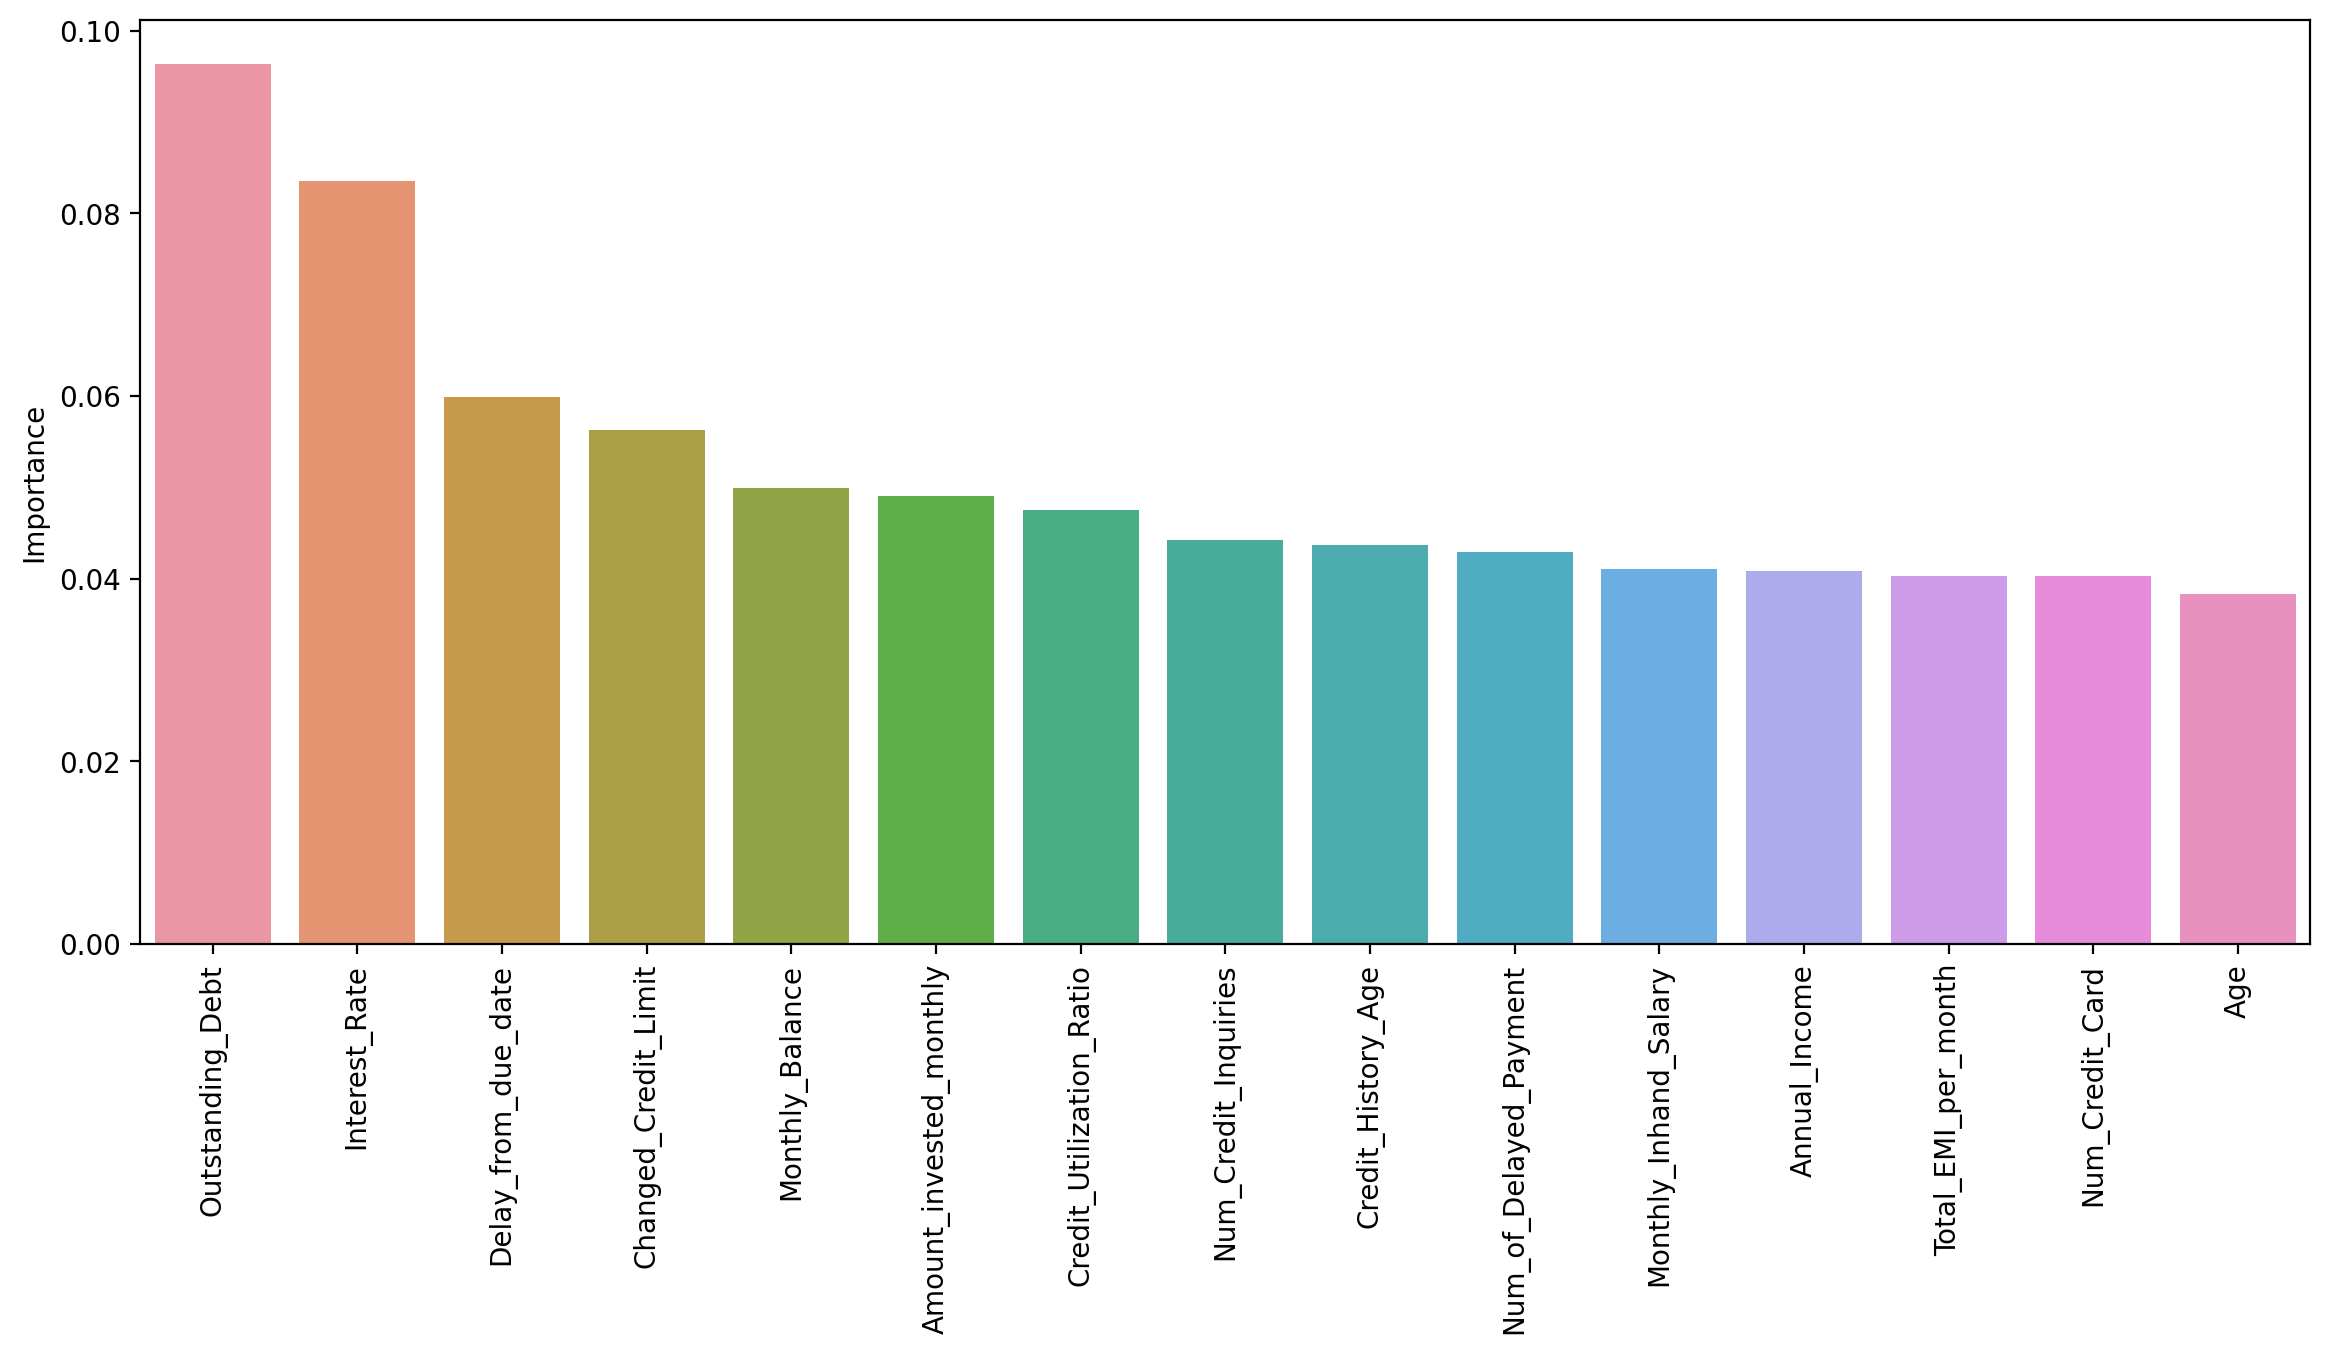

In [68]:
# Plot out the importance value against the names of the 15 most important features
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats_rfc.sort_values('Importance',ascending=False).iloc[:15],
            x=imp_feats_rfc.sort_values('Importance',ascending=False).iloc[:15].index,y='Importance')
plt.xticks(rotation=90);

In [69]:
feat_import_abc = abc_grid.best_estimator_.feature_importances_
imp_feats_abc = pd.DataFrame(index=X.columns,data=feat_import_abc,columns=['Importance'])
imp_feats_abc.sort_values("Importance",ascending=False).iloc[:15]

,Importance
Outstanding_Debt,0.1625
Interest_Rate,0.1000
Annual_Income,0.0875
Amount_invested_monthly,0.0625
Num_Credit_Card,0.0625
Changed_Credit_Limit,0.0500
Total_EMI_per_month,0.0500
Monthly_Balance,0.0375
Num_Bank_Accounts,0.0375
Delay_from_due_date,0.0375


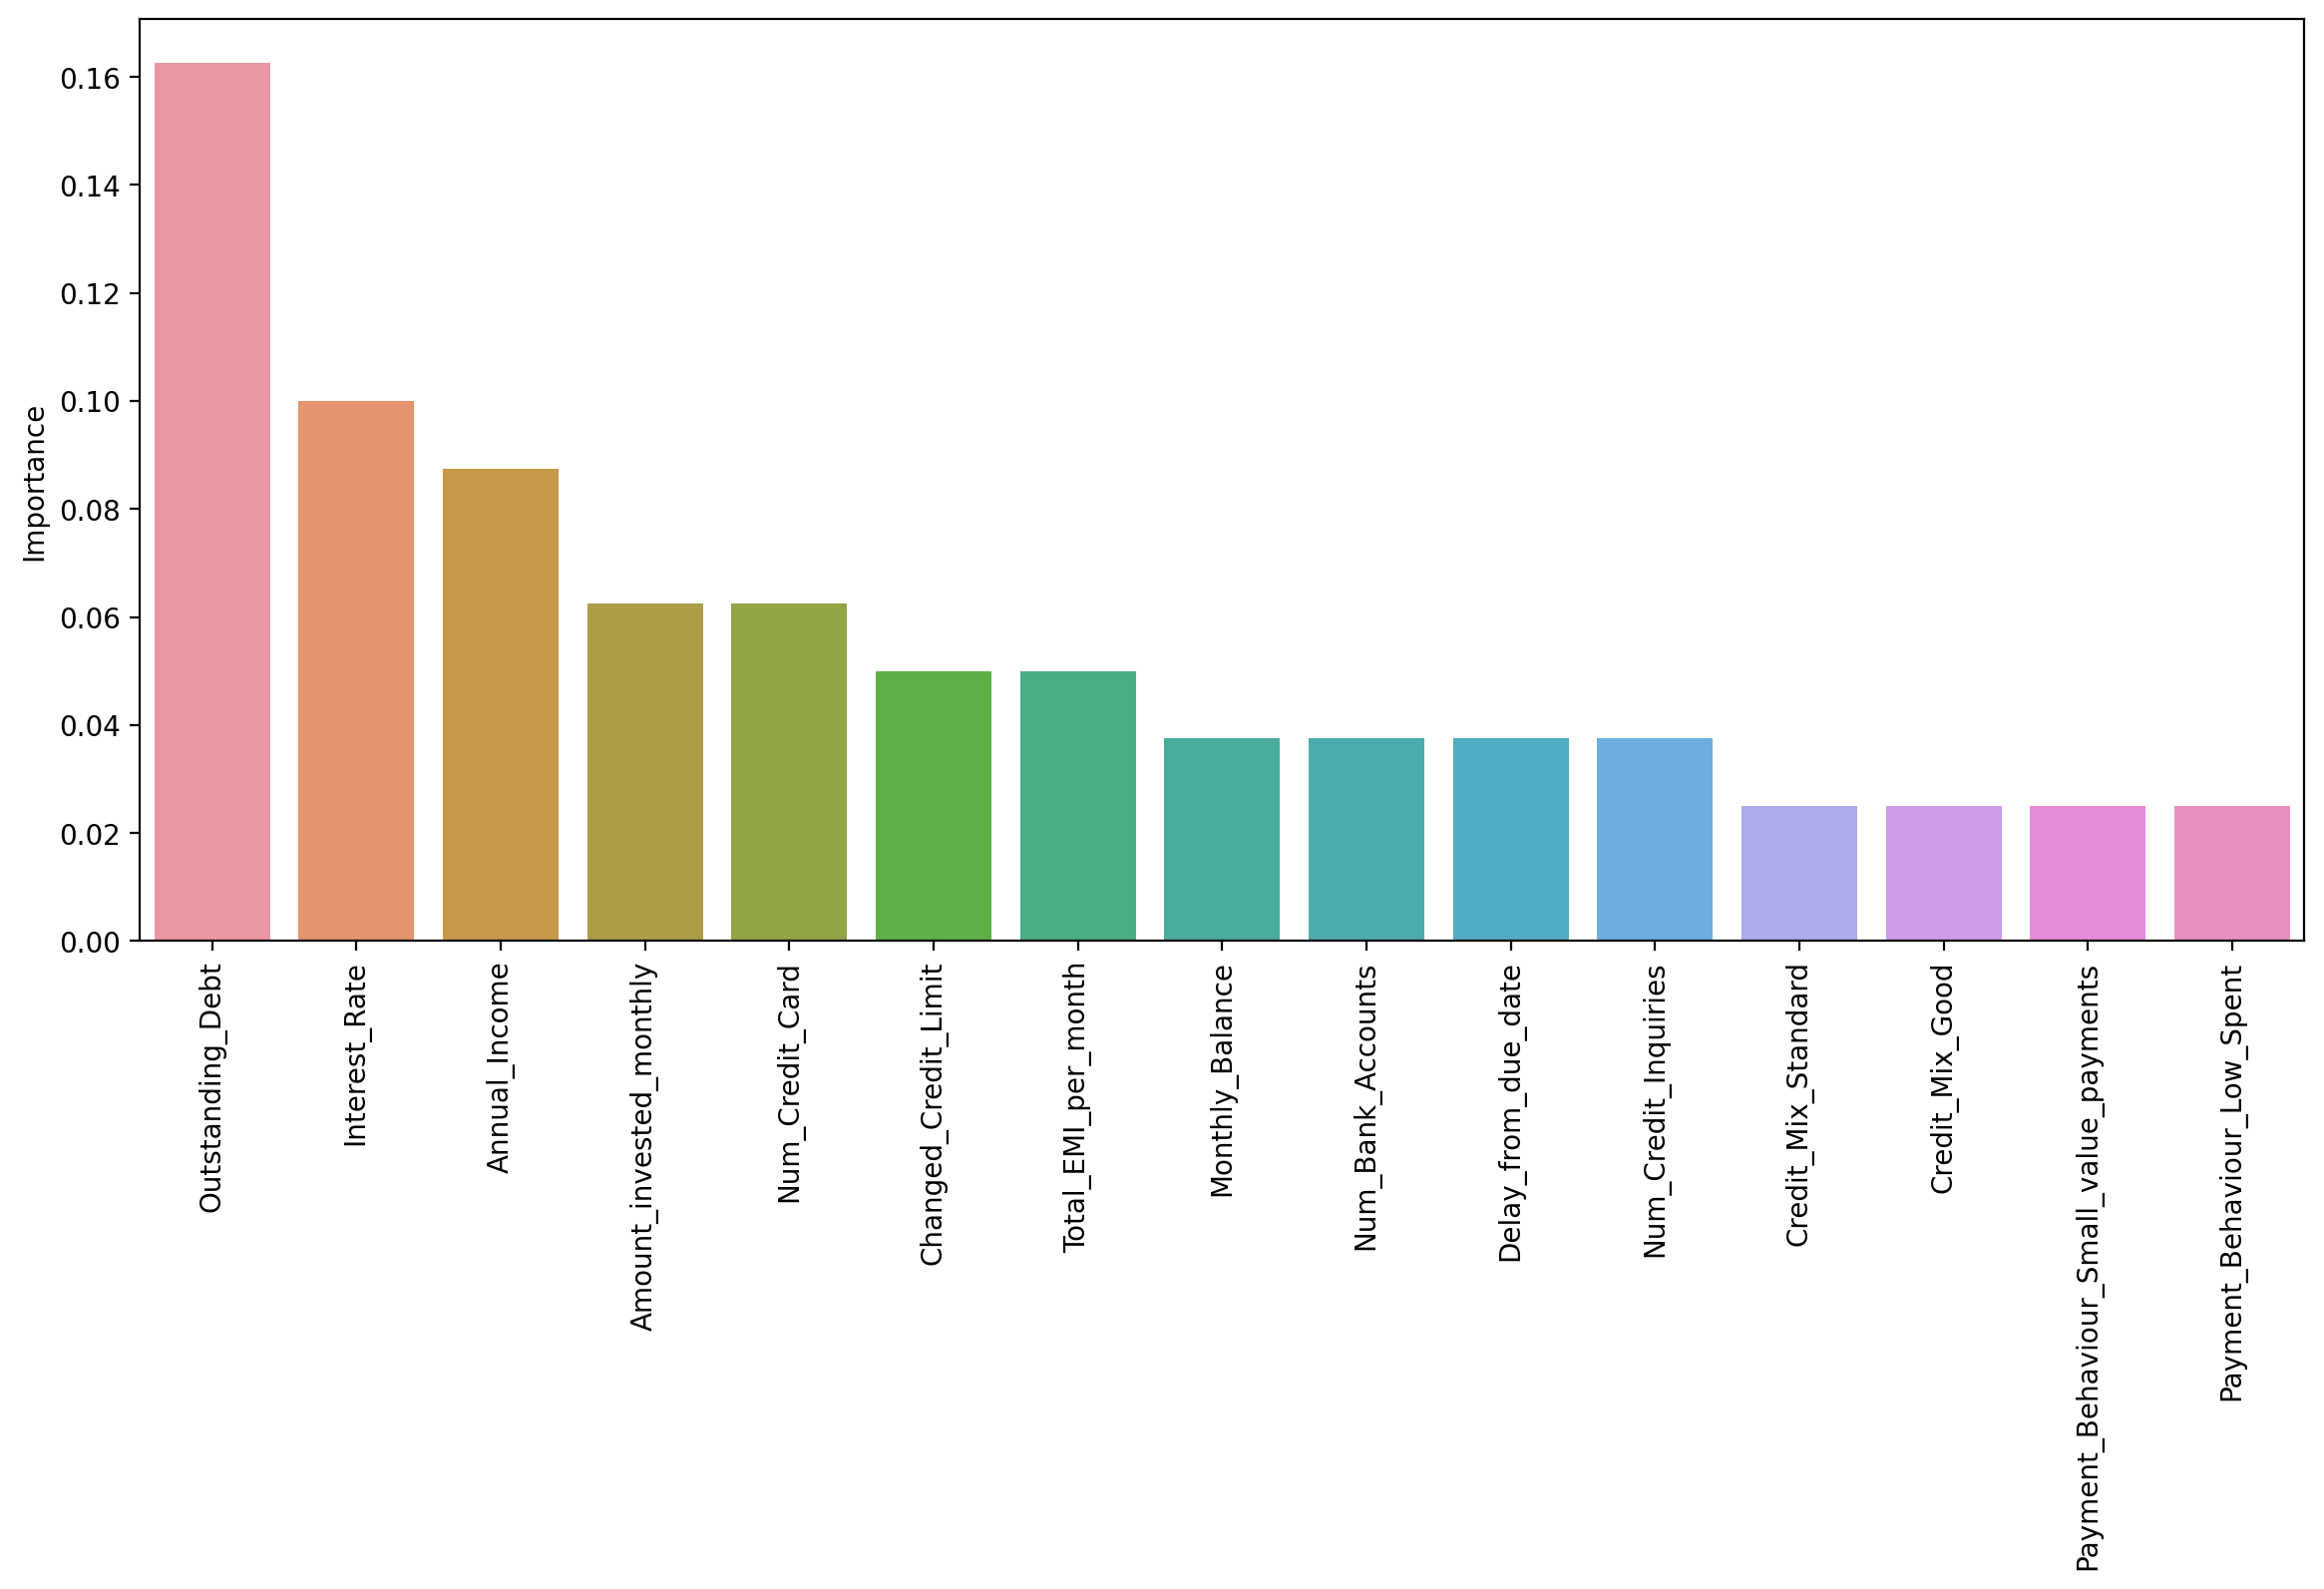

In [70]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats_abc.sort_values('Importance',ascending=False).iloc[:15],
            x=imp_feats_abc.sort_values('Importance',ascending=False).iloc[:15].index,y='Importance')
plt.xticks(rotation=90);

In [71]:
feat_import_gbc = gbc_grid.best_estimator_.feature_importances_
imp_feats_gbc = pd.DataFrame(index=X.columns,data=feat_import_gbc,columns=['Importance'])
imp_feats_gbc.sort_values("Importance",ascending=False).iloc[:15]

,Importance
Outstanding_Debt,0.258355
Interest_Rate,0.098211
Credit_Mix_Good,0.087483
Credit_Mix_Standard,0.062007
Changed_Credit_Limit,0.057523
Delay_from_due_date,0.052639
Num_Bank_Accounts,0.041146
Total_EMI_per_month,0.037261
Num_Credit_Card,0.036830
Monthly_Inhand_Salary,0.036028


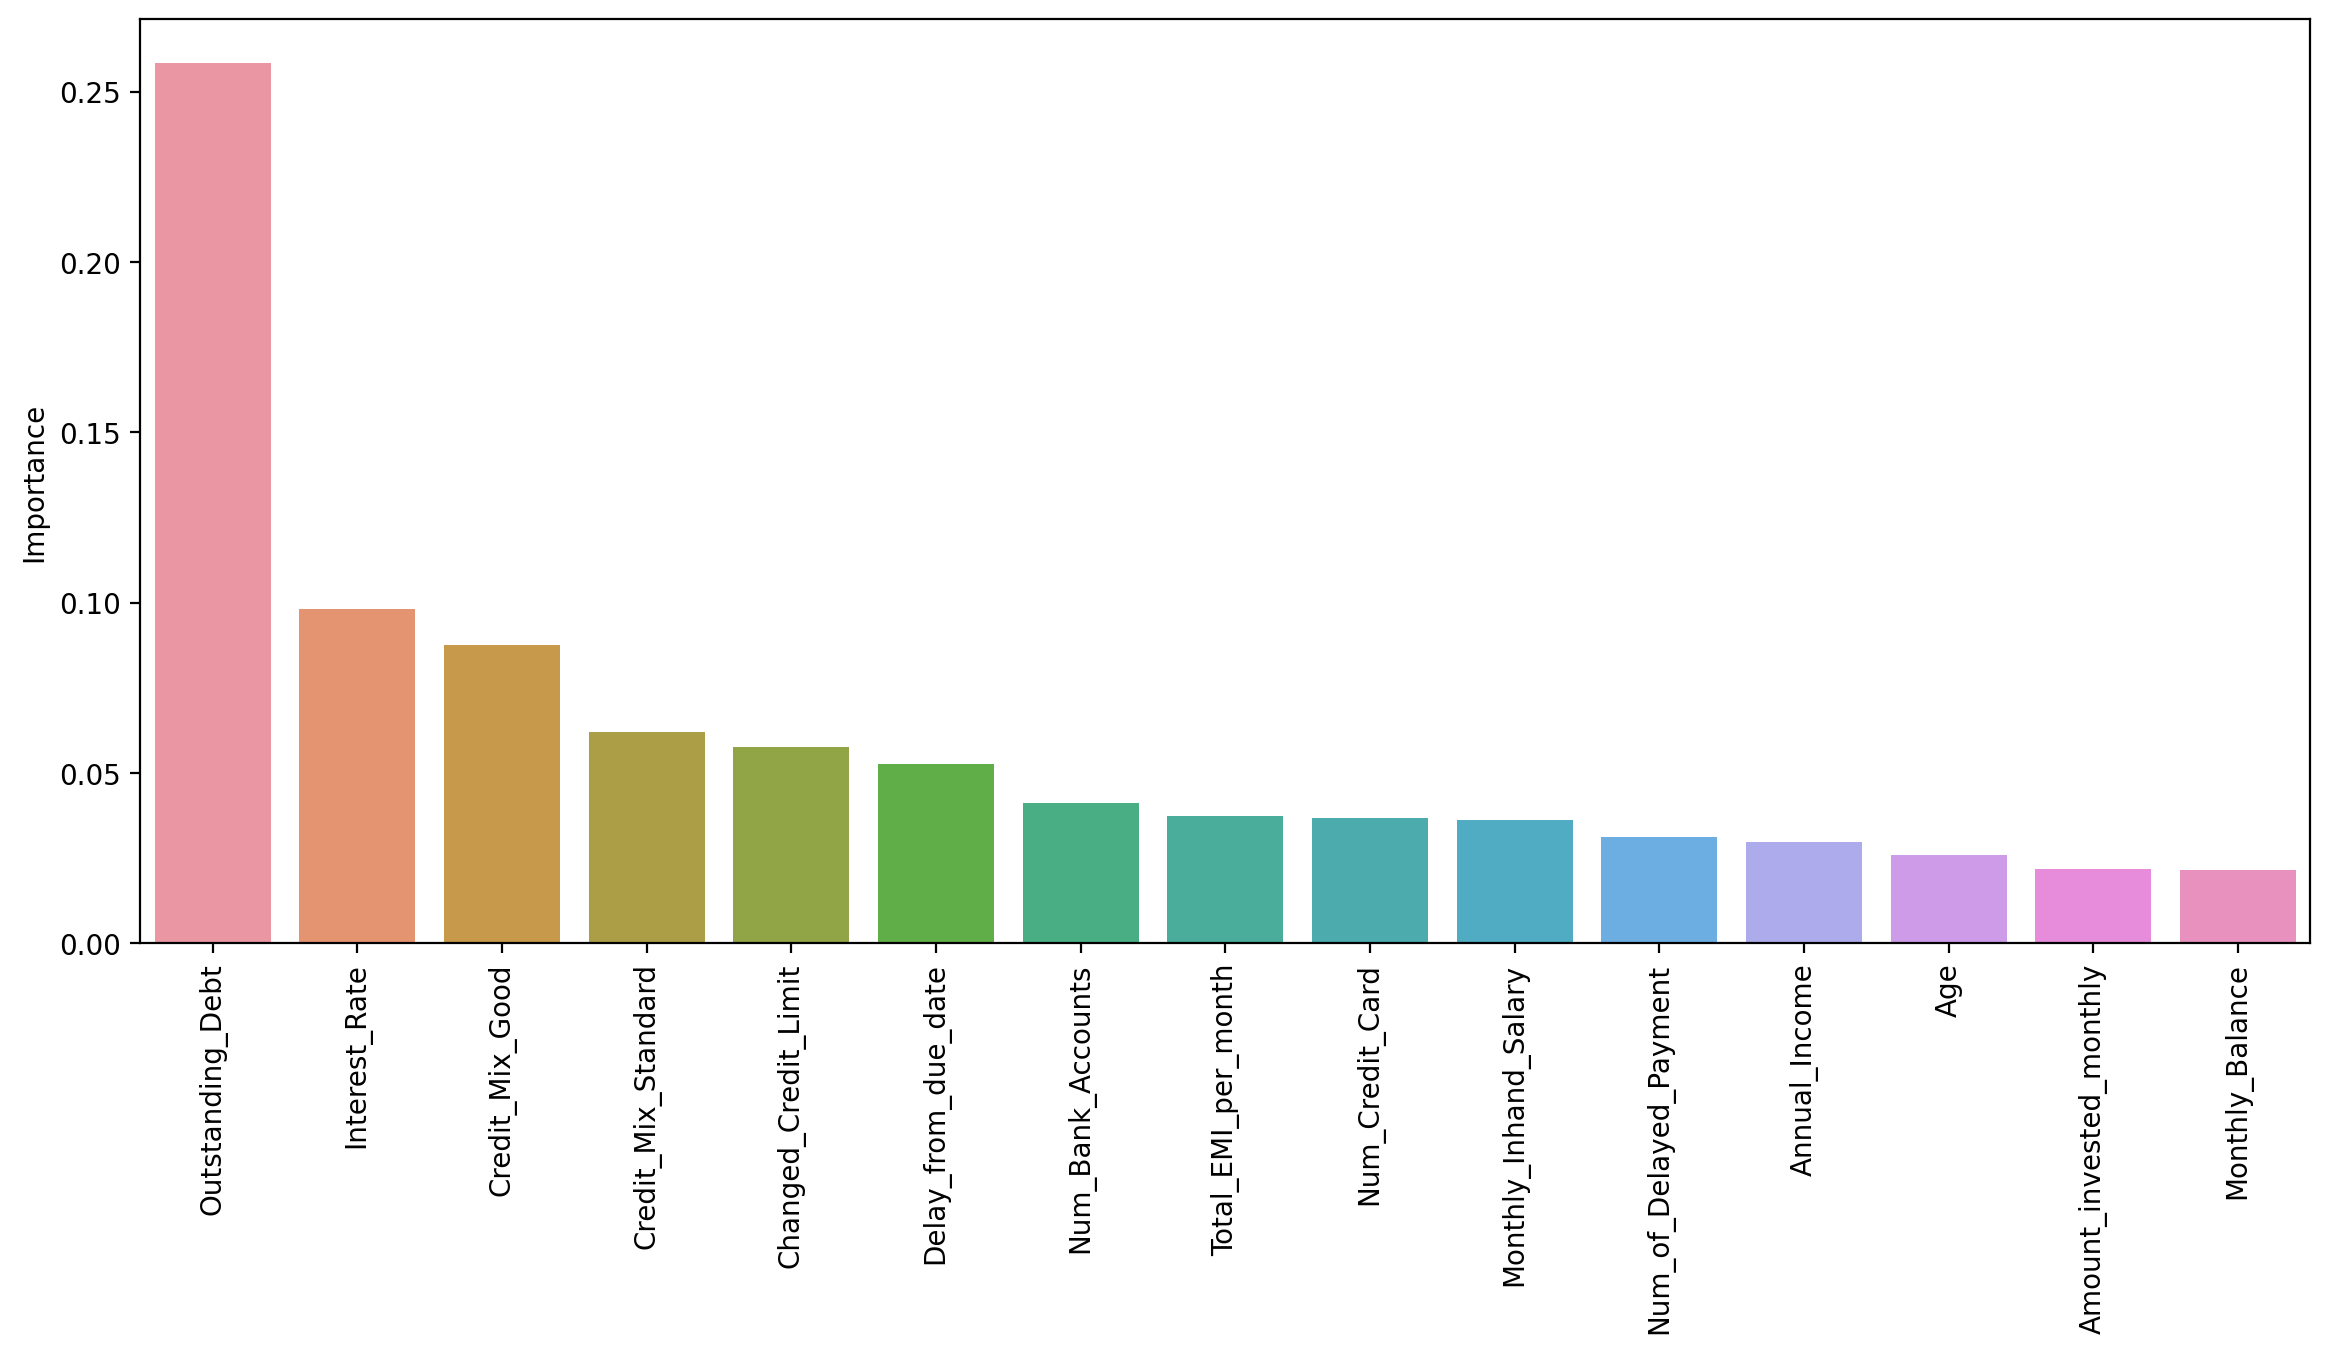

In [72]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats_gbc.sort_values('Importance',ascending=False).iloc[:15],
            x=imp_feats_gbc.sort_values('Importance',ascending=False).iloc[:15].index,y='Importance')
plt.xticks(rotation=90);

All 3 classifiers have chosen Outstanding_Debt and Interest_Rate as the 2 most important features for this classification problem. The classifiers that used the boosting technique (i.e. AdaBoost and Gradient Boosting) had an value of importance for Outstanding_Debt significantly higher than all other features, while the difference on the values of importances of different features for Random Forest was much less.

Predict the dataset for testing using the tree-based algorithms with the highest accuracy among these 3 (i.e. Random Forest) and see its performance on the testing dataset

In [73]:
predictions = rfc_grid.predict(X_test)

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        Good       0.72      0.69      0.70      4010
        Poor       0.79      0.79      0.79      6693
    Standard       0.80      0.81      0.80     12044

    accuracy                           0.78     22747
   macro avg       0.77      0.76      0.77     22747
weighted avg       0.78      0.78      0.78     22747



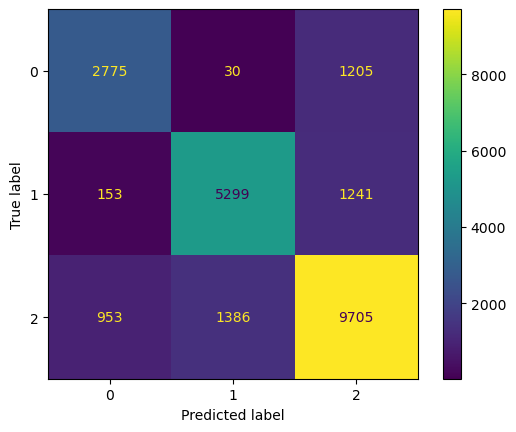

In [75]:
conf_mat_disp = ConfusionMatrixDisplay(confusion_matrix(y_test,predictions))
conf_mat_disp.plot()

Because the accuracy of Gradient Boosting on the training data was quite close to that of Random Forest, we will also check how it performs on the testing data.

In [76]:
predictions_gb = gbc_grid.predict(X_test)

In [77]:
print(classification_report(y_test,predictions_gb))

              precision    recall  f1-score   support

        Good       0.70      0.66      0.68      4010
        Poor       0.78      0.75      0.76      6693
    Standard       0.78      0.80      0.79     12044

    accuracy                           0.76     22747
   macro avg       0.75      0.74      0.74     22747
weighted avg       0.76      0.76      0.76     22747



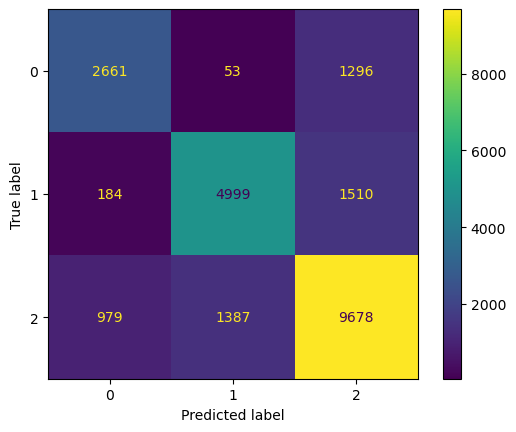

In [78]:
conf_mat_disp_gb = ConfusionMatrixDisplay(confusion_matrix(y_test,predictions_gb))
conf_mat_disp_gb.plot()